In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn
import yfinance

from rfcorr.random_forest import get_corr, get_pairwise_corr

In [2]:
rs = numpy.random.RandomState(42)

In [3]:
# fetch all symbols
symbol_list = ["SPY",
              "XLB",
              "XLE",
              "XLF",
               "XLI",
               "XLK",
               "XLP",
               "XLU",
               "XLV",
               "XLRE",
              ]

symbol_df = yfinance.download(symbol_list, progress=False)
symbol_df = symbol_df.dropna(axis=0)
print(symbol_df.shape)

(1599, 60)


In [4]:
close_close_ret_df = numpy.log(symbol_df.loc[:, "Adj Close"]).diff().iloc[1:]
close_close_ret_df.tail()

,SPY,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV
Date,,,,,,,,,,
2022-02-07,-0.003214,-0.004945,0.012691,0.002988,0.000799,-0.006664,0.001843,0.000214,-0.001461,-0.001740
2022-02-08,0.008194,0.015357,-0.021731,0.013827,0.009932,0.012287,0.003807,-0.009034,0.000731,0.008144
2022-02-09,0.014530,0.021554,0.008313,0.006355,0.013643,0.021938,0.000262,0.023912,0.004375,0.007706
2022-02-10,-0.018129,-0.005843,-0.006265,-0.008811,-0.016513,-0.026497,-0.010800,-0.028895,-0.025643,-0.015774
2022-02-11,-0.018713,-0.013689,0.026538,-0.015858,-0.016186,-0.029214,-0.002851,-0.014656,0.001492,-0.011589


In [5]:
ret_corr_classification_df = pandas.DataFrame(get_pairwise_corr(close_close_ret_df.values, num_trees=1000, lag=0, method="classification", random_state=rs),
                                                columns=close_close_ret_df.columns,
                                                index=close_close_ret_df.columns)
ret_corr_classification_df

,SPY,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV
SPY,1.000000,0.132755,0.048925,0.128535,0.169933,0.334804,0.042457,0.037092,0.024276,0.081223
XLB,0.191937,1.000000,0.105897,0.104798,0.278931,0.076746,0.061336,0.053153,0.052697,0.074505
XLE,0.120477,0.158543,1.000000,0.163233,0.174820,0.090365,0.074315,0.071541,0.071204,0.075503
XLF,0.213250,0.110107,0.126654,1.000000,0.238095,0.085258,0.055829,0.053038,0.052980,0.064790
XLI,0.179666,0.283493,0.084369,0.181435,1.000000,0.069830,0.053669,0.045398,0.045544,0.056597
XLK,0.403187,0.071775,0.064778,0.080490,0.108805,1.000000,0.056200,0.052809,0.045738,0.116217
XLP,0.143504,0.086721,0.066258,0.069258,0.101662,0.074700,1.000000,0.172986,0.186271,0.098641
XLRE,0.124392,0.075886,0.072361,0.071150,0.079174,0.090313,0.190149,1.000000,0.209726,0.086850
XLU,0.088488,0.076497,0.077089,0.082144,0.076356,0.076442,0.193512,0.241791,1.000000,0.087681
XLV,0.265977,0.093845,0.075093,0.086140,0.097031,0.153968,0.095386,0.068288,0.064271,1.000000


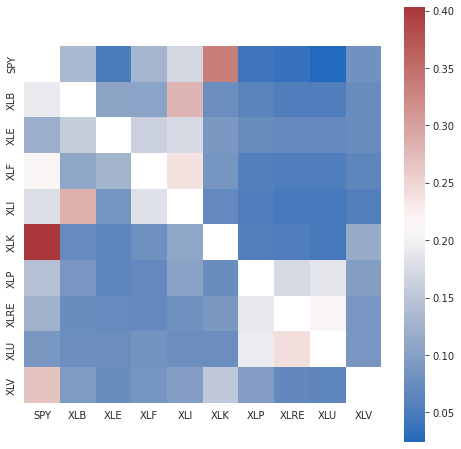

In [6]:
with seaborn.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    for i in range(ret_corr_classification_df.shape[0]):
        ret_corr_classification_df.values[i, i] = numpy.nan
    ax = seaborn.heatmap(ret_corr_classification_df, square=True, cmap="vlag")

In [7]:
ret_corr_regression_df = pandas.DataFrame(get_pairwise_corr(close_close_ret_df.values, num_trees=1000, lag=0, method="regression", random_state=rs),
                                                columns=close_close_ret_df.columns,
                                                index=close_close_ret_df.columns)
ret_corr_regression_df

,SPY,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV
SPY,1.000000,0.041503,0.007878,0.053537,0.136648,0.624316,0.026388,0.023130,0.010830,0.075771
XLB,0.097266,1.000000,0.047678,0.077744,0.623302,0.026879,0.022737,0.045527,0.031327,0.027540
XLE,0.065433,0.176840,1.000000,0.374891,0.144326,0.052107,0.034124,0.057350,0.043395,0.051534
XLF,0.116674,0.076956,0.059423,1.000000,0.603980,0.034463,0.018711,0.047974,0.020847,0.020973
XLI,0.342267,0.331349,0.024175,0.175602,1.000000,0.020024,0.014695,0.058443,0.012354,0.021091
XLK,0.821815,0.017895,0.017388,0.044307,0.022077,1.000000,0.025166,0.017553,0.016043,0.017756
XLP,0.304286,0.038104,0.026473,0.030827,0.047071,0.095630,1.000000,0.101297,0.202689,0.153623
XLRE,0.168400,0.088091,0.031898,0.073103,0.090133,0.041691,0.088253,1.000000,0.361884,0.056548
XLU,0.035946,0.100893,0.044881,0.046190,0.031592,0.035752,0.195468,0.458832,1.000000,0.050446
XLV,0.643399,0.040611,0.033571,0.036607,0.033637,0.074959,0.070747,0.033806,0.032663,1.000000


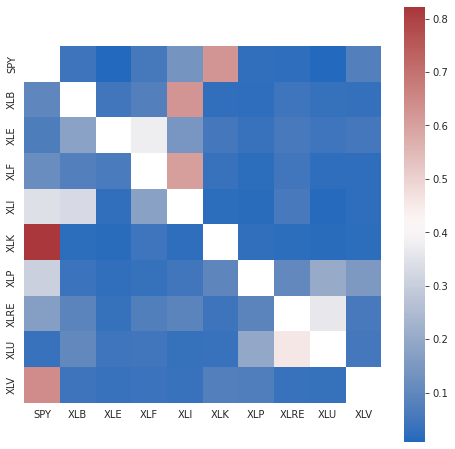

In [8]:
with seaborn.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    for i in range(ret_corr_regression_df.shape[0]):
        ret_corr_regression_df.values[i, i] = numpy.nan
    ax = seaborn.heatmap(ret_corr_regression_df, square=True, cmap="vlag")

In [9]:
ret_lag_corr_classification_df = pandas.DataFrame(get_pairwise_corr(close_close_ret_df.values, num_trees=1000, lag=1, method="classification", random_state=rs),
                                                columns=close_close_ret_df.columns,
                                                index=close_close_ret_df.columns)
ret_lag_corr_classification_df

,SPY,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV
SPY,1.000000,0.109130,0.114480,0.111480,0.106601,0.116167,0.109734,0.110978,0.109940,0.111491
XLB,0.108040,1.000000,0.116687,0.110152,0.114344,0.107412,0.108120,0.108347,0.112212,0.114686
XLE,0.107674,0.113604,1.000000,0.111852,0.108798,0.111693,0.114092,0.110304,0.110073,0.111909
XLF,0.105164,0.109627,0.114809,1.000000,0.111846,0.109710,0.111843,0.114265,0.113222,0.109514
XLI,0.108934,0.108216,0.115280,0.109363,1.000000,0.110772,0.113058,0.109180,0.110328,0.114868
XLK,0.112728,0.110586,0.114715,0.111605,0.107904,1.000000,0.106365,0.109604,0.112632,0.113862
XLP,0.111253,0.116375,0.112508,0.112026,0.103701,0.106717,1.000000,0.116203,0.110980,0.110238
XLRE,0.106998,0.109711,0.124576,0.108544,0.104241,0.109324,0.108240,1.000000,0.122375,0.105990
XLU,0.102446,0.114838,0.125181,0.107860,0.112091,0.102258,0.109273,0.113649,1.000000,0.112403
XLV,0.107653,0.111621,0.114746,0.108890,0.108289,0.112171,0.111068,0.111404,0.114159,1.000000


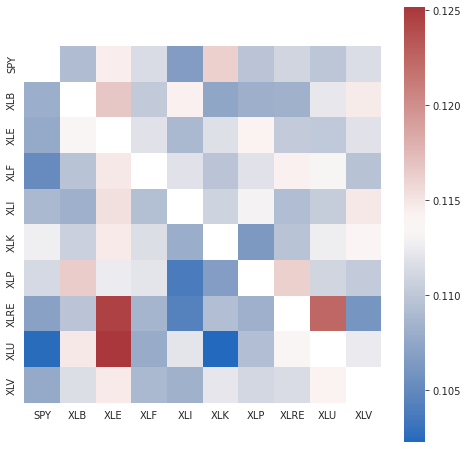

In [10]:
with seaborn.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    for i in range(ret_lag_corr_classification_df.shape[0]):
        ret_lag_corr_classification_df.values[i, i] = numpy.nan
    ax = seaborn.heatmap(ret_lag_corr_classification_df, square=True, cmap="vlag")

In [19]:
ret_lag_corr_regression_df = pandas.DataFrame(get_pairwise_corr(close_close_ret_df.values, num_trees=1000, lag=1, method="regression", random_state=rs),
                                                columns=close_close_ret_df.columns,
                                                index=close_close_ret_df.columns)
ret_lag_corr_regression_df

,SPY,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV
SPY,1.000000,0.103099,0.119157,0.098028,0.083564,0.108218,0.151764,0.084460,0.134933,0.116777
XLB,0.080121,1.000000,0.130087,0.098518,0.093074,0.101466,0.155090,0.091128,0.118129,0.132387
XLE,0.082175,0.096598,1.000000,0.157586,0.132354,0.092572,0.144956,0.093763,0.101423,0.098572
XLF,0.073635,0.103807,0.128340,1.000000,0.088416,0.089386,0.165004,0.096320,0.124870,0.130223
XLI,0.078949,0.107512,0.112174,0.099411,1.000000,0.094411,0.151833,0.097419,0.128656,0.129636
XLK,0.101969,0.105935,0.117313,0.108564,0.087881,1.000000,0.121046,0.104256,0.125819,0.127217
XLP,0.085897,0.087723,0.114933,0.112893,0.105500,0.113967,1.000000,0.101725,0.165345,0.112016
XLRE,0.070201,0.098540,0.113002,0.112051,0.087851,0.100477,0.160581,1.000000,0.133679,0.123619
XLU,0.080745,0.098041,0.122532,0.105397,0.101008,0.095159,0.163148,0.107394,1.000000,0.126576
XLV,0.085218,0.104227,0.130887,0.108586,0.098854,0.097093,0.121630,0.100833,0.152672,1.000000


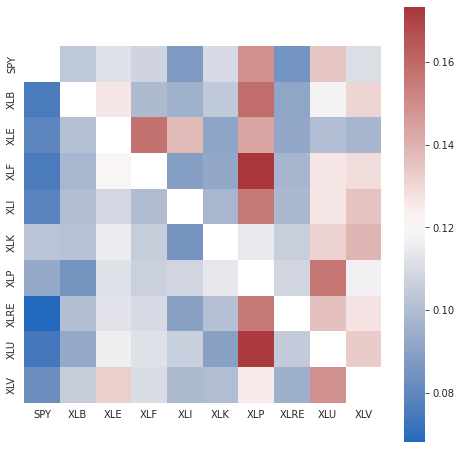

In [12]:
with seaborn.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    for i in range(ret_lag_corr_regression_df.shape[0]):
        ret_lag_corr_regression_df.values[i, i] = numpy.nan
    ax = seaborn.heatmap(ret_lag_corr_regression_df, square=True, cmap="vlag")

In [28]:
v, h = numpy.linalg.eigh(ret_lag_corr_regression_df)
numpy.abs(v)

array([0.81124136, 0.84600949, 0.86743856, 0.8811743 , 0.89928662,
       0.91032095, 0.92934456, 0.93630928, 0.96649426, 1.95238061])

In [13]:
ret_pearson_corr_df = close_close_ret_df.corr(method="pearson")
ret_pearson_corr_df

,SPY,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV
SPY,1.000000,0.857342,0.697493,0.858989,0.895917,0.931389,0.766852,0.730372,0.598315,0.855445
XLB,0.857342,1.000000,0.732789,0.828620,0.889978,0.720416,0.652564,0.636846,0.520123,0.705600
XLE,0.697493,0.732789,1.000000,0.758440,0.744161,0.530119,0.464713,0.496381,0.373911,0.525646
XLF,0.858989,0.828620,0.758440,1.000000,0.885175,0.688426,0.625062,0.627422,0.484828,0.695052
XLI,0.895917,0.889978,0.744161,0.885175,1.000000,0.746959,0.686554,0.675822,0.550346,0.733131
XLK,0.931389,0.720416,0.530119,0.688426,0.746959,1.000000,0.652064,0.619494,0.482403,0.765962
XLP,0.766852,0.652564,0.464713,0.625062,0.686554,0.652064,1.000000,0.717225,0.743916,0.710090
XLRE,0.730372,0.636846,0.496381,0.627422,0.675822,0.619494,0.717225,1.000000,0.759471,0.639923
XLU,0.598315,0.520123,0.373911,0.484828,0.550346,0.482403,0.743916,0.759471,1.000000,0.563037
XLV,0.855445,0.705600,0.525646,0.695052,0.733131,0.765962,0.710090,0.639923,0.563037,1.000000


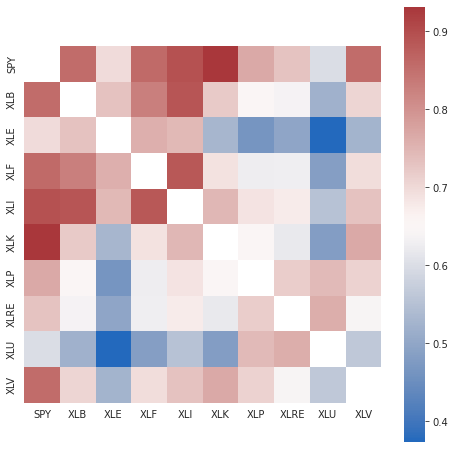

In [14]:
with seaborn.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    for i in range(ret_pearson_corr_df.shape[0]):
        ret_pearson_corr_df.values[i, i] = numpy.nan
    ax = seaborn.heatmap(ret_pearson_corr_df, square=True, cmap="vlag")

In [15]:
ret_spearman_corr_df = close_close_ret_df.corr(method="spearman")

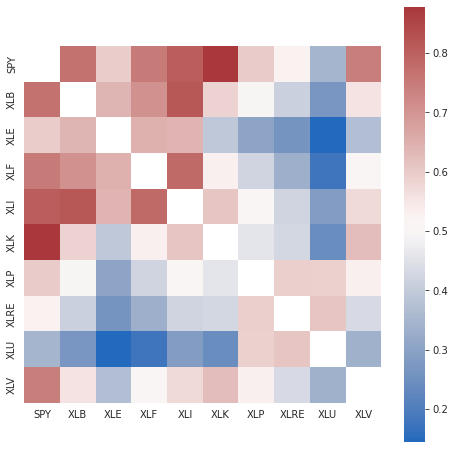

In [16]:
with seaborn.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    for i in range(ret_spearman_corr_df.shape[0]):
        ret_spearman_corr_df.values[i, i] = numpy.nan
    ax = seaborn.heatmap(ret_spearman_corr_df, square=True, cmap="vlag")